For each dataset,   the variable class indicates whether the data is normal or anomalous.
Pick one of the four sets

Requirements


1.) Try to locate some background on the data,   ideally a data dictionary.

2.) Some of the data sets are very large, particularly the census set.   You may have to reduce the number of variables you used in the detection to just those that seem particularly relevant or interesting.   You may also need to work with a limited number of rows,  at least for the SVM based encoder.

3.) Determine how many normal data rows you have (class=0) and how many anomalies.   Split your data into an anomalous set,  and split the anomalous set into two pieces (test and validation) of roughly equal size.    Split the regular data (class 0) into three sets,  (train, test and validation) with the test and evaluation data sets the same size as the anomalous test and validation sets.  Use all the remaining “regular” data as your training set.
Remember this is “unsupervised” learning to create an anomaly detector.

4.) Do some exploratory data analysis to understand what you are working with.   Do a range of various types of summary or descriptive analysis.
Include a heat map of the correlation of the variables.

5.) Create an SVM based anomaly detector,   set it with a variable cutoff boundary,  set this to 5% to start with,  but be sure it is adjustable in code.
SVM gives you various options of operation,   try several and find the optimum.

6.) Produce a confusion matrix of correct and incorrect anomaly detections, using your validation data.   Show this at several different boundary levels.

7.) Now build an anomaly detector (autoencoder) using Tensorflow and Keras.  Optimize its operation at least a  bit
.
Determine how to set up the boundary to detect anomalous and non-anomalous results.


8.)  Decide which of the two methods seems to work best, using your validation data.   Can you figure out how to make simultaneous use of both methods to improve overall performance?   Do the two methods make the same mistakes in anomaly detection or are there differences in the two?
Once you have figured out what method, or combination of methods, works best,  set it up and run it on your test data.
Report the rate of correct assignment of both anomalies and regular (normal) data.


#Pick one of the four sets

I pick bank-additional-full_normalised



#1.) Try to locate some background on the data, ideally a data dictionary.

Okay lets get googleing.

 Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone")
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


This data set looks like a one hot encoded and normalized version, clean and ready to enter a model.

Seperation

Seperation

Seperation

#2.) Some of the data sets are very large, particularly the census set. You may have to reduce the number of variables you used in the detection to just those that seem particularly relevant or interesting. You may also need to work with a limited number of rows, at least for the SVM based encoder.

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [376]:
#load the data, change the file address

infile= "/content/bank-additional-full_normalised.csv"
bank=pd.read_csv(infile)

In [377]:
bank.head()

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,month=may,month=jun,month=jul,month=aug,month=oct,month=nov,month=dec,month=mar,month=apr,month=sep,day_of_week=mon,day_of_week=tue,day_of_week=wed,day_of_week=thu,day_of_week=fri,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
0,0.209877,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.027654,0.127273,1.0,0.000000,1,0,0,1.000000,0.882307,0.376569,0.980730,1.000000,0
1,0.296296,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.017080,0.072727,1.0,0.000000,1,0,0,1.000000,0.484412,0.615063,0.981183,1.000000,0
2,0.246914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.028060,0.090909,1.0,0.000000,1,0,0,0.937500,0.698753,0.602510,0.957379,0.859735,0
3,0.160494,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.043310,0.018182,1.0,0.142857,0,1,0,0.333333,0.269680,0.192469,0.150759,0.512287,0
4,0.530864,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.110817,0.000000,1.0,0.000000,1,0,0,0.333333,0.340608,0.154812,0.174790,0.512287,1


In [378]:
pd.set_option('display.max_columns', None)
bank.head()

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,month=may,month=jun,month=jul,month=aug,month=oct,month=nov,month=dec,month=mar,month=apr,month=sep,day_of_week=mon,day_of_week=tue,day_of_week=wed,day_of_week=thu,day_of_week=fri,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
0,0.209877,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.027654,0.127273,1.0,0.000000,1,0,0,1.000000,0.882307,0.376569,0.980730,1.000000,0
1,0.296296,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.017080,0.072727,1.0,0.000000,1,0,0,1.000000,0.484412,0.615063,0.981183,1.000000,0
2,0.246914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.028060,0.090909,1.0,0.000000,1,0,0,0.937500,0.698753,0.602510,0.957379,0.859735,0
3,0.160494,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.043310,0.018182,1.0,0.142857,0,1,0,0.333333,0.269680,0.192469,0.150759,0.512287,0
4,0.530864,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.110817,0.000000,1.0,0.000000,1,0,0,0.333333,0.340608,0.154812,0.174790,0.512287,1


In [379]:
bank.shape

(41188, 63)

In [380]:
bank.isnull().values.any()

False

I am going to get rid off day of weeek, and month of year.

In [381]:
bank2 = bank.drop(columns=["month=may","month=jun","month=jul",	"month=aug", "month=oct",	"month=nov", "month=dec", "month=mar", "month=apr", "month=sep", "day_of_week=mon",	"day_of_week=tue", "day_of_week=wed", "day_of_week=thu", "day_of_week=fri"])

In [382]:
bank2.head()

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
0,0.209877,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0.027654,0.127273,1.0,0.000000,1,0,0,1.000000,0.882307,0.376569,0.980730,1.000000,0
1,0.296296,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0.017080,0.072727,1.0,0.000000,1,0,0,1.000000,0.484412,0.615063,0.981183,1.000000,0
2,0.246914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0.028060,0.090909,1.0,0.000000,1,0,0,0.937500,0.698753,0.602510,0.957379,0.859735,0
3,0.160494,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0.043310,0.018182,1.0,0.142857,0,1,0,0.333333,0.269680,0.192469,0.150759,0.512287,0
4,0.530864,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0.110817,0.000000,1.0,0.000000,1,0,0,0.333333,0.340608,0.154812,0.174790,0.512287,1


### As far as column reduction goes I hope removing 15 is enough. These are the largest catagories so I got rid off them, it reduces size and it's of 1 catagory well there is month and day but it's all time.

3.) Determine how many normal data rows you have (class=0) and how many anomalies. Split your data into an anomalous set, and split the anomalous set into two pieces (test and validation) of roughly equal size. Split the regular data (class 0) into three sets, (train, test and validation) with the test and evaluation data sets the same size as the anomalous test and validation sets. Use all the remaining “regular” data as your training set. Remember this is “unsupervised” learning to create an anomaly detector.

In [383]:
#normal data rows

print("Normal data row size: "+ str(len(bank2[bank2['class']==0])))
print("Anomalies data row size: "+ str(len(bank2[bank2['class']==1])))

normalData = bank2[bank2['class']==0]
anomaliesData = bank2[bank2['class']==1]


Normal data row size: 36548
Anomalies data row size: 4640


In [384]:
#yNormal = normalData['class']
yAnomalies = anomaliesData['class']


In [385]:

#normalData= normalData.drop(columns=['class'])
anomaliesData= anomaliesData.drop(columns=['class'])

In [386]:
normalData.shape

(36548, 48)

In [387]:
anomaliesData.shape

(4640, 47)

In [388]:
#yNormal.shape

In [389]:
yAnomalies.shape

(4640,)

In [390]:
anomaliesData

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
4,0.530864,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0.110817,0.000000,1.0,0.000000,1,0,0,0.333333,0.340608,0.154812,0.174790,0.512287
23,0.197531,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0.160228,0.181818,1.0,0.000000,1,0,0,0.937500,0.698753,0.602510,0.957379,0.859735
33,0.160494,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0.063644,0.000000,1.0,0.000000,1,0,0,0.687500,0.622369,0.435146,0.950578,0.877883
44,0.209877,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0.106954,0.000000,1.0,0.000000,1,0,0,1.000000,0.484412,0.615063,0.982544,1.000000
50,0.111111,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0.055917,0.018182,1.0,0.142857,0,1,0,0.354167,0.722525,0.460251,0.030152,0.105860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41149,0.061728,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0.086417,0.018182,1.0,0.000000,1,0,0,0.104167,0.000000,0.811715,0.054183,0.425709
41163,0.246914,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0.070150,0.000000,1.0,0.000000,1,0,0,0.333333,0.269680,0.192469,0.143278,0.512287
41166,0.567901,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0.068117,0.000000,1.0,0.000000,1,0,0,0.000000,0.089634,1.000000,0.024031,0.203781
41177,0.123457,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0.035990,0.018182,1.0,0.000000,1,0,0,0.354167,0.711613,0.523013,0.061437,0.105860


In [391]:
yAnomalies

4        1
23       1
33       1
44       1
50       1
        ..
41149    1
41163    1
41166    1
41177    1
41184    1
Name: class, Length: 4640, dtype: int64

In [392]:
# Split the anomalous set into two pieces (test and validation) of roughly equal size.

from sklearn.model_selection import train_test_split

X_test_anomalies, X_validation_anomalies, y_test_anomalies, y_validation_anomalies = train_test_split(anomaliesData, yAnomalies,train_size=0.5,random_state=1)

In [393]:
X_test_anomalies.head()

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
22279,0.098765,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0.252745,0.109091,1.0,0.0,1,0,0,1.000000,0.882307,0.376569,0.980277,1.000000
3877,0.456790,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0.106344,0.036364,1.0,0.0,1,0,0,1.000000,0.484412,0.615063,0.981637,1.000000
32463,0.234568,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0.056120,0.018182,1.0,0.0,1,0,0,0.354167,0.784879,0.439331,0.038087,0.105860
13250,0.444444,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0.101871,0.036364,1.0,0.0,1,0,0,0.104167,0.296960,0.418410,0.142371,0.425709
9707,0.320988,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0.140098,0.018182,1.0,0.0,1,0,0,0.083333,0.199532,0.744770,0.016550,0.226465


Split the regular data (class 0) into three sets, (train, test and validation) with the test and evaluation data sets the same size as the anomalous test and validation sets.

In [394]:
normalData.shape

(36548, 48)

In [395]:
X_test_normal = normalData.sample(len(X_test_anomalies))

In [396]:
y_test_normal = X_test_normal['class']
X_test_normal = X_test_normal.drop(columns=['class'])

In [397]:
normalData=normalData.drop(X_test_normal.index)

In [398]:
X_validation_normal = normalData.sample(len(X_validation_anomalies))

In [399]:
y_validation_normal = X_validation_normal['class']
X_validation_normal = X_validation_normal.drop(columns=['class'])

In [400]:
normalData=normalData.drop(X_validation_normal.index)

In [401]:
normalData.shape

(31908, 48)

In [402]:
X_validation_normal

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
35979,0.493827,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0.034160,0.054545,1.0,0.000000,1,0,0,0.937500,0.698753,0.602510,0.957606,0.859735
16088,0.283951,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0.012403,0.018182,1.0,0.000000,1,0,0,1.000000,0.882307,0.376569,0.959193,1.000000
31279,0.160494,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0.022570,0.018182,1.0,0.142857,0,1,0,0.104167,0.296960,0.418410,0.141918,0.425709
1801,0.419753,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0.056527,0.018182,1.0,0.000000,1,0,0,0.333333,0.250195,0.033473,0.204942,0.512287
35082,0.296296,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0.085604,0.090909,1.0,0.000000,1,0,0,1.000000,0.669135,0.338912,0.981410,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39237,0.222222,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0.069744,0.018182,1.0,0.000000,1,0,0,0.937500,0.698753,0.602510,0.956926,0.859735
6804,0.271605,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0.035177,0.145455,1.0,0.000000,1,0,0,0.333333,0.269680,0.192469,0.146679,0.512287
22717,0.172840,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0.033754,0.018182,1.0,0.000000,1,0,0,1.000000,0.882307,0.376569,0.959420,1.000000
36427,0.469136,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.072997,0.000000,1.0,0.000000,1,0,0,0.937500,0.698753,0.602510,0.957606,0.859735


In [403]:
X_test_normal

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
26488,0.234568,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0.011183,0.000000,1.0,0.0,1,0,0,0.333333,0.269680,0.192469,0.157107,0.512287
3792,0.259259,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0.088654,0.000000,1.0,0.0,1,0,0,0.937500,0.698753,0.602510,0.958059,0.859735
19839,0.432099,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0.023587,0.090909,1.0,0.0,1,0,0,1.000000,0.669135,0.338912,0.980730,1.000000
33220,0.098765,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0.005083,0.054545,1.0,0.0,1,0,0,0.937500,0.698753,0.602510,0.958966,0.859735
28937,0.160494,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0.013827,0.145455,1.0,0.0,1,0,0,0.937500,0.698753,0.602510,0.957379,0.859735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23812,0.407407,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0.018910,0.000000,1.0,0.0,1,0,0,0.333333,0.340608,0.154812,0.174790,0.512287
30177,0.259259,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0.012200,0.054545,1.0,0.0,1,0,0,1.000000,0.484412,0.615063,0.981637,1.000000
15758,0.308642,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0.038430,0.000000,1.0,0.0,1,0,0,0.937500,0.698753,0.602510,0.957153,0.859735
8647,0.197531,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0.012403,0.400000,1.0,0.0,1,0,0,1.000000,0.882307,0.376569,0.981183,1.000000


In [404]:
y_train_normal = normalData['class']
X_train_normal = normalData.drop(columns=['class'])

In [405]:
y_train_normal

0        0
1        0
2        0
3        0
5        0
        ..
41182    0
41183    0
41185    0
41186    0
41187    0
Name: class, Length: 31908, dtype: int64

In [406]:
X_train_normal

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.209877,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0.027654,0.127273,1.0,0.000000,1,0,0,1.000000,0.882307,0.376569,0.980730,1.000000
1,0.296296,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0.017080,0.072727,1.0,0.000000,1,0,0,1.000000,0.484412,0.615063,0.981183,1.000000
2,0.246914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0.028060,0.090909,1.0,0.000000,1,0,0,0.937500,0.698753,0.602510,0.957379,0.859735
3,0.160494,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0.043310,0.018182,1.0,0.142857,0,1,0,0.333333,0.269680,0.192469,0.150759,0.512287
5,0.456790,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0.002643,0.090909,1.0,0.000000,1,0,0,0.687500,0.389322,0.368201,0.767853,0.877883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,0.432099,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0.053680,0.036364,1.0,0.000000,1,0,0,1.000000,0.669135,0.338912,0.981410,1.000000
41183,0.271605,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0.061814,0.000000,1.0,0.000000,1,0,0,0.333333,0.269680,0.192469,0.158694,0.512287
41185,0.172840,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0.107361,0.000000,1.0,0.000000,1,0,0,0.937500,0.698753,0.602510,0.956926,0.859735
41186,0.148148,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0.020943,0.036364,1.0,0.000000,1,0,0,1.000000,0.882307,0.376569,0.980503,1.000000


In [407]:
X_test_normal

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
26488,0.234568,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0.011183,0.000000,1.0,0.0,1,0,0,0.333333,0.269680,0.192469,0.157107,0.512287
3792,0.259259,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0.088654,0.000000,1.0,0.0,1,0,0,0.937500,0.698753,0.602510,0.958059,0.859735
19839,0.432099,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0.023587,0.090909,1.0,0.0,1,0,0,1.000000,0.669135,0.338912,0.980730,1.000000
33220,0.098765,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0.005083,0.054545,1.0,0.0,1,0,0,0.937500,0.698753,0.602510,0.958966,0.859735
28937,0.160494,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0.013827,0.145455,1.0,0.0,1,0,0,0.937500,0.698753,0.602510,0.957379,0.859735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23812,0.407407,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0.018910,0.000000,1.0,0.0,1,0,0,0.333333,0.340608,0.154812,0.174790,0.512287
30177,0.259259,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0.012200,0.054545,1.0,0.0,1,0,0,1.000000,0.484412,0.615063,0.981637,1.000000
15758,0.308642,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0.038430,0.000000,1.0,0.0,1,0,0,0.937500,0.698753,0.602510,0.957153,0.859735
8647,0.197531,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0.012403,0.400000,1.0,0.0,1,0,0,1.000000,0.882307,0.376569,0.981183,1.000000


In [408]:
y_test_normal

26488    0
3792     0
19839    0
33220    0
28937    0
        ..
23812    0
30177    0
15758    0
8647     0
373      0
Name: class, Length: 2320, dtype: int64

In [409]:
y_validation_normal

35979    0
16088    0
31279    0
1801     0
35082    0
        ..
39237    0
6804     0
22717    0
36427    0
22447    0
Name: class, Length: 2320, dtype: int64

Seesh too many things to keep track of.

#4.) Do some exploratory data analysis to understand what you are working with. Do a range of various types of summary or descriptive analysis. Include a heat map of the correlation of the variables.

In [410]:
normalData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31908 entries, 0 to 41187
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            31908 non-null  float64
 1   job=housemaid                  31908 non-null  int64  
 2   job=services                   31908 non-null  int64  
 3   job=admin.                     31908 non-null  int64  
 4   job=blue-collar                31908 non-null  int64  
 5   job=technician                 31908 non-null  int64  
 6   job=retired                    31908 non-null  int64  
 7   job=management                 31908 non-null  int64  
 8   job=unemployed                 31908 non-null  int64  
 9   job=self-employed              31908 non-null  int64  
 10  job=unknown                    31908 non-null  int64  
 11  job=entrepreneur               31908 non-null  int64  
 12  job=student                    31908 non-null  int6

In [411]:
anomaliesData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4640 entries, 4 to 41184
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4640 non-null   float64
 1   job=housemaid                  4640 non-null   int64  
 2   job=services                   4640 non-null   int64  
 3   job=admin.                     4640 non-null   int64  
 4   job=blue-collar                4640 non-null   int64  
 5   job=technician                 4640 non-null   int64  
 6   job=retired                    4640 non-null   int64  
 7   job=management                 4640 non-null   int64  
 8   job=unemployed                 4640 non-null   int64  
 9   job=self-employed              4640 non-null   int64  
 10  job=unknown                    4640 non-null   int64  
 11  job=entrepreneur               4640 non-null   int64  
 12  job=student                    4640 non-null   int64

In [412]:
X_train_normal.describe()

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000,31908.000000
mean,0.282734,0.026294,0.099379,0.249185,0.234581,0.165350,0.035508,0.070453,0.024257,0.034631,0.007992,0.036041,0.016328,0.612668,0.270935,0.114485,0.001912,0.102576,0.232262,0.057540,0.152532,0.126332,0.040993,0.287420,0.000345,0.776733,0.223173,0.000094,0.454494,0.521249,0.024257,0.824589,0.151153,0.024257,0.610913,0.044921,0.029724,0.985114,0.018979,0.886956,0.100038,0.013006,0.760128,0.546348,0.427154,0.720375,0.803679
std,0.122412,0.160012,0.299176,0.432548,0.423743,0.371502,0.185064,0.255912,0.153849,0.182846,0.089040,0.186395,0.126736,0.487148,0.444450,0.318405,0.043682,0.303409,0.422282,0.232876,0.359542,0.332228,0.198277,0.452566,0.018564,0.416442,0.416380,0.009696,0.497933,0.499556,0.153849,0.380324,0.358204,0.153849,0.487551,0.041832,0.052742,0.120709,0.058704,0.316651,0.300055,0.113302,0.309165,0.218085,0.183867,0.371463,0.244366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.019317,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.333333,0.340608,0.338912,0.174790,0.512287
50%,0.259259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.033347,0.018182,1.000000,0.000000,1.000000,0.000000,0.000000,0.937500,0.669135,0.376569,0.957379,0.877883
75%,0.370370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.056730,0.036364,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.698753,0.602510,0.981183,1.000000
max,0.962963,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

In [413]:
X_test_normal.describe()

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.0,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000
mean,0.284759,0.024569,0.105172,0.249138,0.240517,0.153448,0.031466,0.071552,0.022845,0.035345,0.009483,0.041379,0.015086,0.603448,0.288793,0.106034,0.001724,0.107759,0.236638,0.056897,0.144828,0.131897,0.034052,0.287069,0.000862,0.772414,0.227586,0.0,0.466810,0.511207,0.021983,0.819828,0.158190,0.021983,0.611207,0.044958,0.029373,0.983289,0.018288,0.890948,0.094828,0.014224,0.763191,0.549316,0.424228,0.723344,0.807175
std,0.119561,0.154841,0.306842,0.432607,0.427490,0.360497,0.174610,0.257800,0.149441,0.184690,0.096938,0.199209,0.121922,0.489287,0.453299,0.307948,0.041496,0.310142,0.425110,0.231695,0.352003,0.338451,0.181401,0.452492,0.029355,0.419364,0.419364,0.0,0.499005,0.499982,0.146659,0.384414,0.364997,0.146659,0.487581,0.042796,0.048019,0.127830,0.058055,0.311771,0.293040,0.118439,0.307538,0.215935,0.181530,0.369742,0.240627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000227,0.000000
25%,0.185185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.018910,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.333333,0.340608,0.338912,0.175924,0.512287
50%,0.259259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.032940,0.018182,1.000000,0.000000,1.000000,0.000000,0.000000,0.937500,0.669135,0.376569,0.957606,0.877883
75%,0.370370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.056578,0.036364,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.698753,0.602510,0.981183,1.000000
max,0.827160,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

In [414]:
X_validation_normal.describe()

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.0,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000
mean,0.282604,0.025000,0.099569,0.233190,0.246983,0.164224,0.034483,0.078448,0.018534,0.036638,0.006897,0.037069,0.018966,0.623707,0.272845,0.102155,0.001293,0.096983,0.225862,0.058621,0.159052,0.134052,0.040086,0.284914,0.000431,0.782328,0.217672,0.0,0.435776,0.539224,0.025000,0.813362,0.161638,0.025000,0.594828,0.044645,0.029585,0.986698,0.018596,0.885345,0.101293,0.013362,0.757920,0.548470,0.428713,0.717107,0.799799
std,0.121912,0.156159,0.299489,0.422953,0.431350,0.370559,0.182505,0.268934,0.134903,0.187912,0.082776,0.188972,0.136433,0.484559,0.445518,0.302918,0.035944,0.295998,0.418239,0.234964,0.365803,0.340781,0.196204,0.451471,0.020761,0.412752,0.412752,0.0,0.495965,0.498567,0.156159,0.389705,0.368198,0.156159,0.491031,0.045135,0.049359,0.114325,0.055395,0.318674,0.301781,0.114844,0.307418,0.216530,0.184085,0.372118,0.244389
min,0.012346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001017,0.000000,0.001001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000227,0.000000
25%,0.197531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.019113,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.333333,0.340608,0.338912,0.174790,0.512287
50%,0.259259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.033042,0.018182,1.000000,0.000000,1.000000,0.000000,0.000000,0.937500,0.669135,0.376569,0.957379,0.859735
75%,0.358025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.055714,0.036364,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000
max,0.851852,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

Lets do the anomaliesData sets.

In [415]:
X_test_anomalies.describe()

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.0,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000
mean,0.290336,0.021552,0.074138,0.285776,0.132759,0.160776,0.096983,0.068534,0.034914,0.029741,0.007328,0.026724,0.060776,0.543966,0.349138,0.104310,0.002586,0.093966,0.230172,0.040086,0.100862,0.131034,0.050862,0.351724,0.001293,0.908621,0.091379,0.0,0.438793,0.535345,0.025862,0.821552,0.152586,0.025862,0.838362,0.113537,0.018879,0.783203,0.074815,0.662931,0.135345,0.201724,0.451401,0.454101,0.459892,0.334887,0.492276
std,0.169098,0.145246,0.262052,0.451881,0.339387,0.367403,0.295998,0.252715,0.183601,0.169910,0.085306,0.161311,0.238970,0.498171,0.476800,0.305729,0.050800,0.291844,0.421034,0.196204,0.301211,0.337511,0.219763,0.477611,0.035944,0.288210,0.288210,0.0,0.496347,0.498857,0.158758,0.382972,0.359666,0.158758,0.368198,0.083789,0.030853,0.410578,0.126720,0.472811,0.342165,0.401374,0.337669,0.265016,0.256151,0.394940,0.333768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.160494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.052257,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.269680,0.192469,0.049195,0.203781
50%,0.246914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.091704,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.333333,0.389322,0.435146,0.143278,0.512287
75%,0.407407,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.150468,0.018182,1.000000,0.142857,1.000000,0.000000,0.000000,0.687500,0.669135,0.615063,0.809454,0.859735
max,0.925926,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

In [416]:
X_validation_anomalies.describe()

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.0,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000
mean,0.300112,0.024138,0.065086,0.296983,0.142241,0.153879,0.090086,0.072845,0.027155,0.034483,0.008621,0.026724,0.057759,0.547414,0.349138,0.100862,0.002586,0.090517,0.214224,0.040948,0.103017,0.125431,0.057328,0.368103,0.000431,0.900431,0.099569,0.0,0.434483,0.545259,0.020259,0.837931,0.141810,0.020259,0.822414,0.111429,0.019365,0.802454,0.065948,0.690948,0.125431,0.183621,0.451329,0.444875,0.461465,0.340304,0.502174
std,0.172449,0.153510,0.246731,0.457027,0.349373,0.360911,0.286367,0.259938,0.162570,0.182505,0.092467,0.161311,0.233337,0.497854,0.476800,0.301211,0.050800,0.286983,0.410371,0.198213,0.304047,0.331278,0.232518,0.482394,0.020761,0.299489,0.299489,0.0,0.495796,0.498055,0.140914,0.368594,0.348931,0.140914,0.382246,0.079297,0.029732,0.396784,0.118832,0.462202,0.331278,0.387258,0.338914,0.262345,0.257679,0.395241,0.328383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.172840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.051037,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.269680,0.192469,0.048742,0.203781
50%,0.259259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.091297,0.018182,1.000000,0.000000,1.000000,0.000000,0.000000,0.333333,0.389322,0.435146,0.143278,0.512287
75%,0.407407,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.151332,0.018182,1.000000,0.142857,1.000000,0.000000,0.000000,0.687500,0.669135,0.615063,0.915495,0.859735
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

In [417]:
X_test_anomalies.head()

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
22279,0.098765,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0.252745,0.109091,1.0,0.0,1,0,0,1.000000,0.882307,0.376569,0.980277,1.000000
3877,0.456790,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0.106344,0.036364,1.0,0.0,1,0,0,1.000000,0.484412,0.615063,0.981637,1.000000
32463,0.234568,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0.056120,0.018182,1.0,0.0,1,0,0,0.354167,0.784879,0.439331,0.038087,0.105860
13250,0.444444,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0.101871,0.036364,1.0,0.0,1,0,0,0.104167,0.296960,0.418410,0.142371,0.425709
9707,0.320988,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0.140098,0.018182,1.0,0.0,1,0,0,0.083333,0.199532,0.744770,0.016550,0.226465


In [418]:
X_validation_anomalies.head()

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
11341,0.234568,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0.208825,0.018182,1.000000,0.000000,1,0,0,0.333333,0.269680,0.192469,0.138291,0.512287
15351,0.481481,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0.027247,0.000000,1.000000,0.000000,1,0,0,0.000000,0.174591,0.866109,0.018136,0.203781
24020,0.074074,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0.034974,0.000000,0.003003,0.285714,0,0,1,0.000000,0.174591,0.866109,0.018363,0.203781
31584,0.197531,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0.159008,0.109091,1.000000,0.000000,1,0,0,1.000000,0.669135,0.338912,0.981410,1.000000
434,0.024691,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0.056527,0.036364,1.000000,0.000000,1,0,0,0.333333,0.340608,0.154812,0.174790,0.512287


they are diffrent but freakishly close statistic

###Include a heat map of the correlation of the variables.

In [419]:
import seaborn as sns


<Axes: >

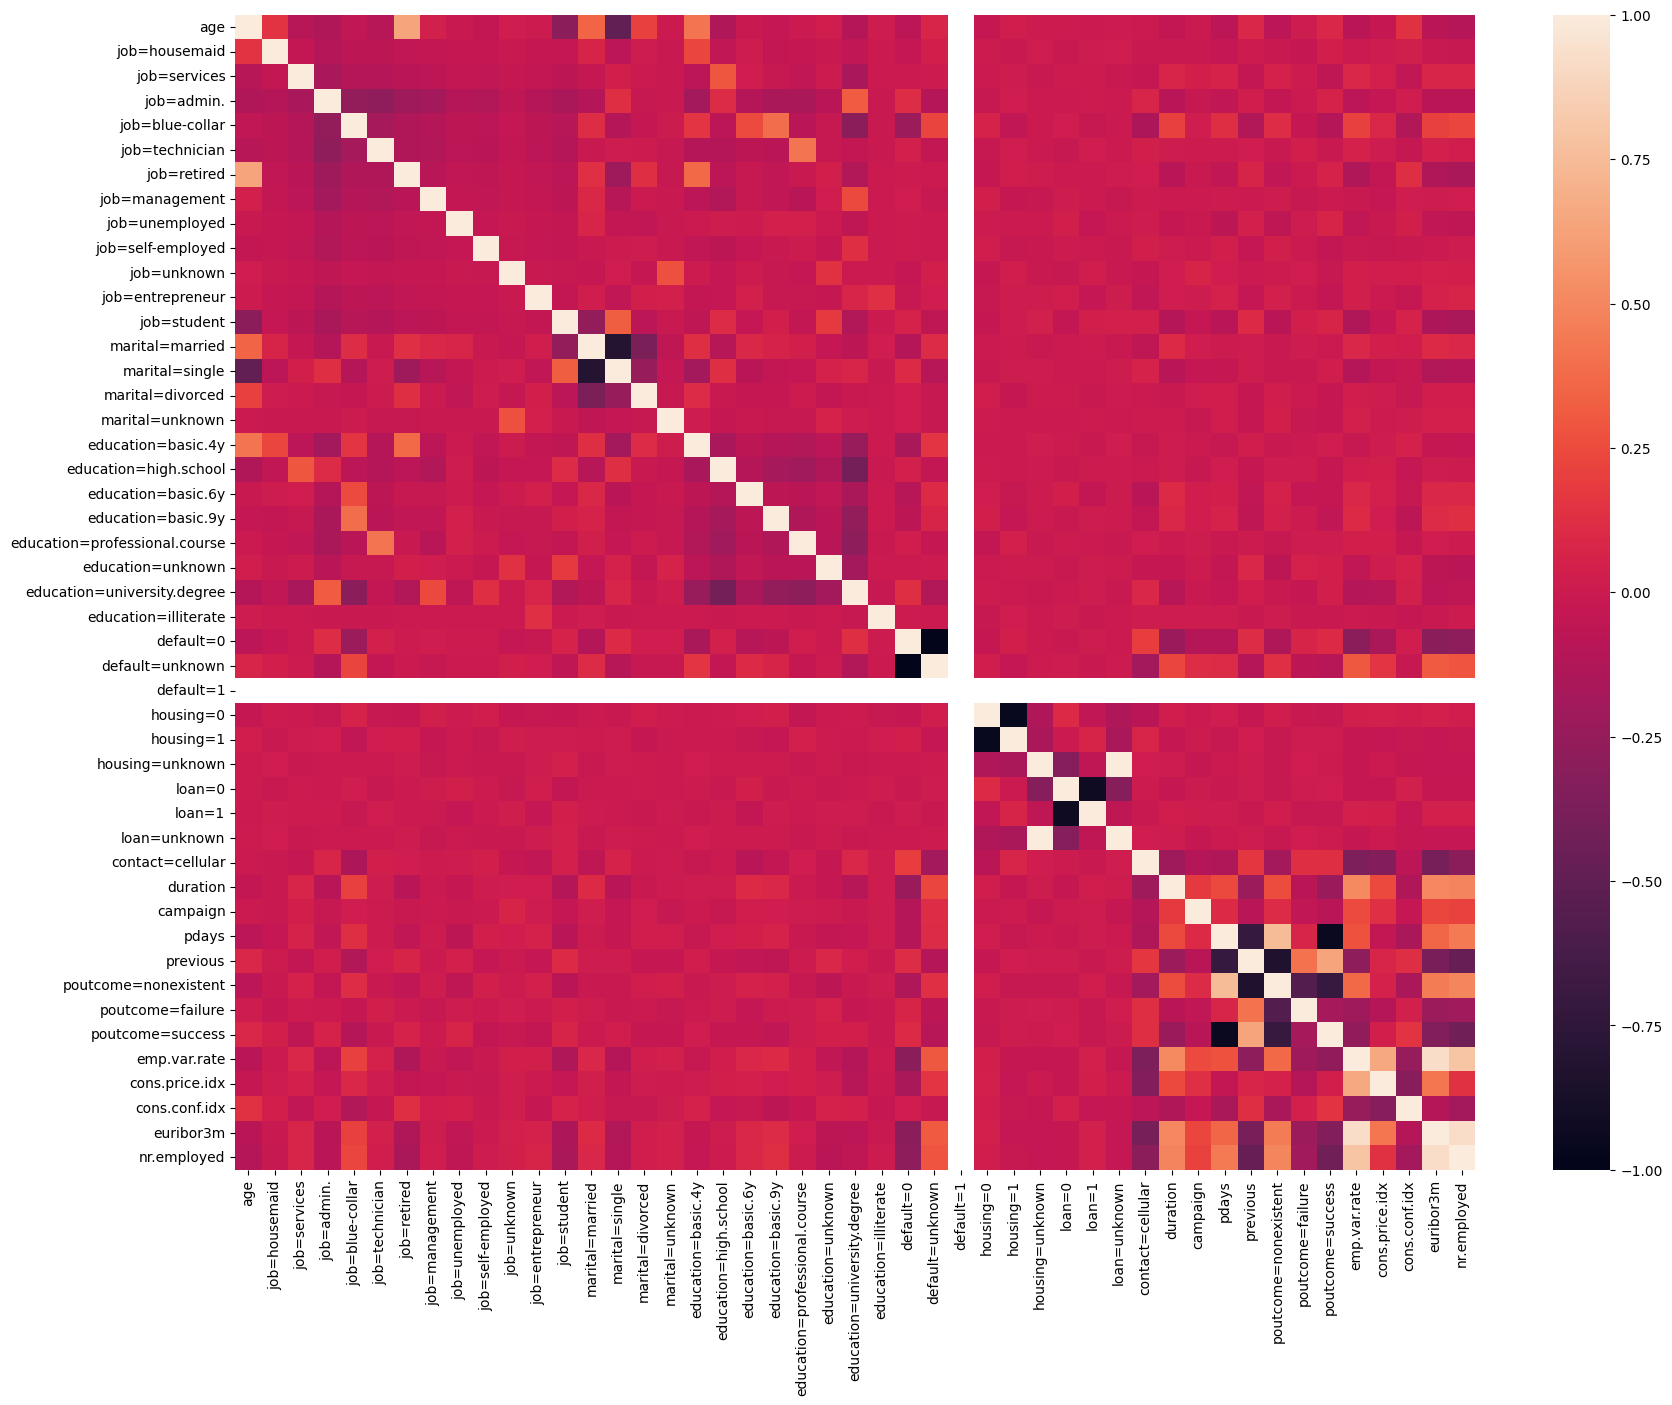

In [420]:
corr1 = X_validation_anomalies.corr()
#sn.heatmap(corr1, annot = True)
plt.subplots(figsize=(20,15))
sns.heatmap(corr1)

<Axes: >

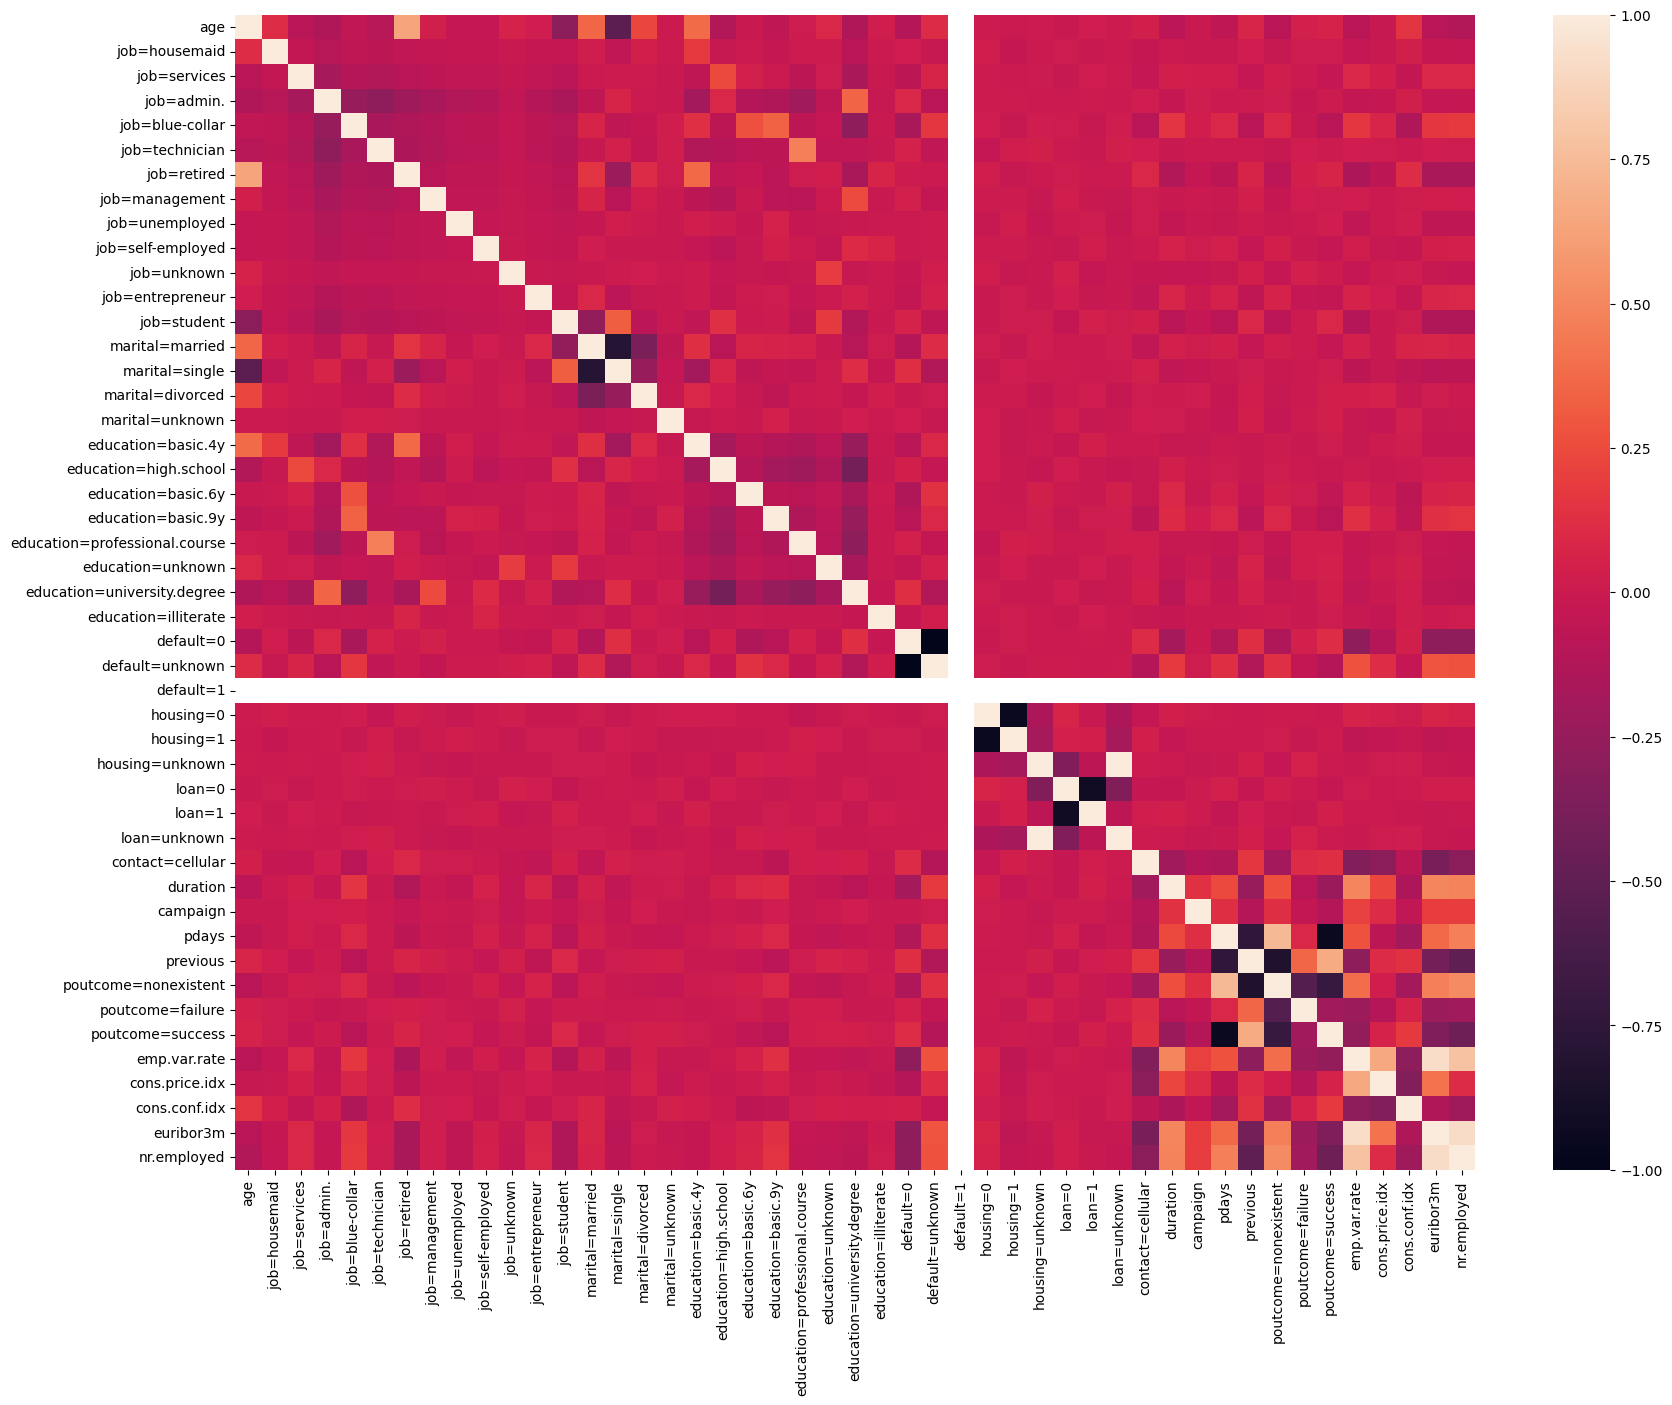

In [421]:
corr2 = X_test_anomalies.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr2)

###Lets do the normal ones

In [422]:
X_validation_normal

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
35979,0.493827,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0.034160,0.054545,1.0,0.000000,1,0,0,0.937500,0.698753,0.602510,0.957606,0.859735
16088,0.283951,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0.012403,0.018182,1.0,0.000000,1,0,0,1.000000,0.882307,0.376569,0.959193,1.000000
31279,0.160494,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0.022570,0.018182,1.0,0.142857,0,1,0,0.104167,0.296960,0.418410,0.141918,0.425709
1801,0.419753,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0.056527,0.018182,1.0,0.000000,1,0,0,0.333333,0.250195,0.033473,0.204942,0.512287
35082,0.296296,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0.085604,0.090909,1.0,0.000000,1,0,0,1.000000,0.669135,0.338912,0.981410,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39237,0.222222,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0.069744,0.018182,1.0,0.000000,1,0,0,0.937500,0.698753,0.602510,0.956926,0.859735
6804,0.271605,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0.035177,0.145455,1.0,0.000000,1,0,0,0.333333,0.269680,0.192469,0.146679,0.512287
22717,0.172840,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0.033754,0.018182,1.0,0.000000,1,0,0,1.000000,0.882307,0.376569,0.959420,1.000000
36427,0.469136,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.072997,0.000000,1.0,0.000000,1,0,0,0.937500,0.698753,0.602510,0.957606,0.859735


<Axes: >

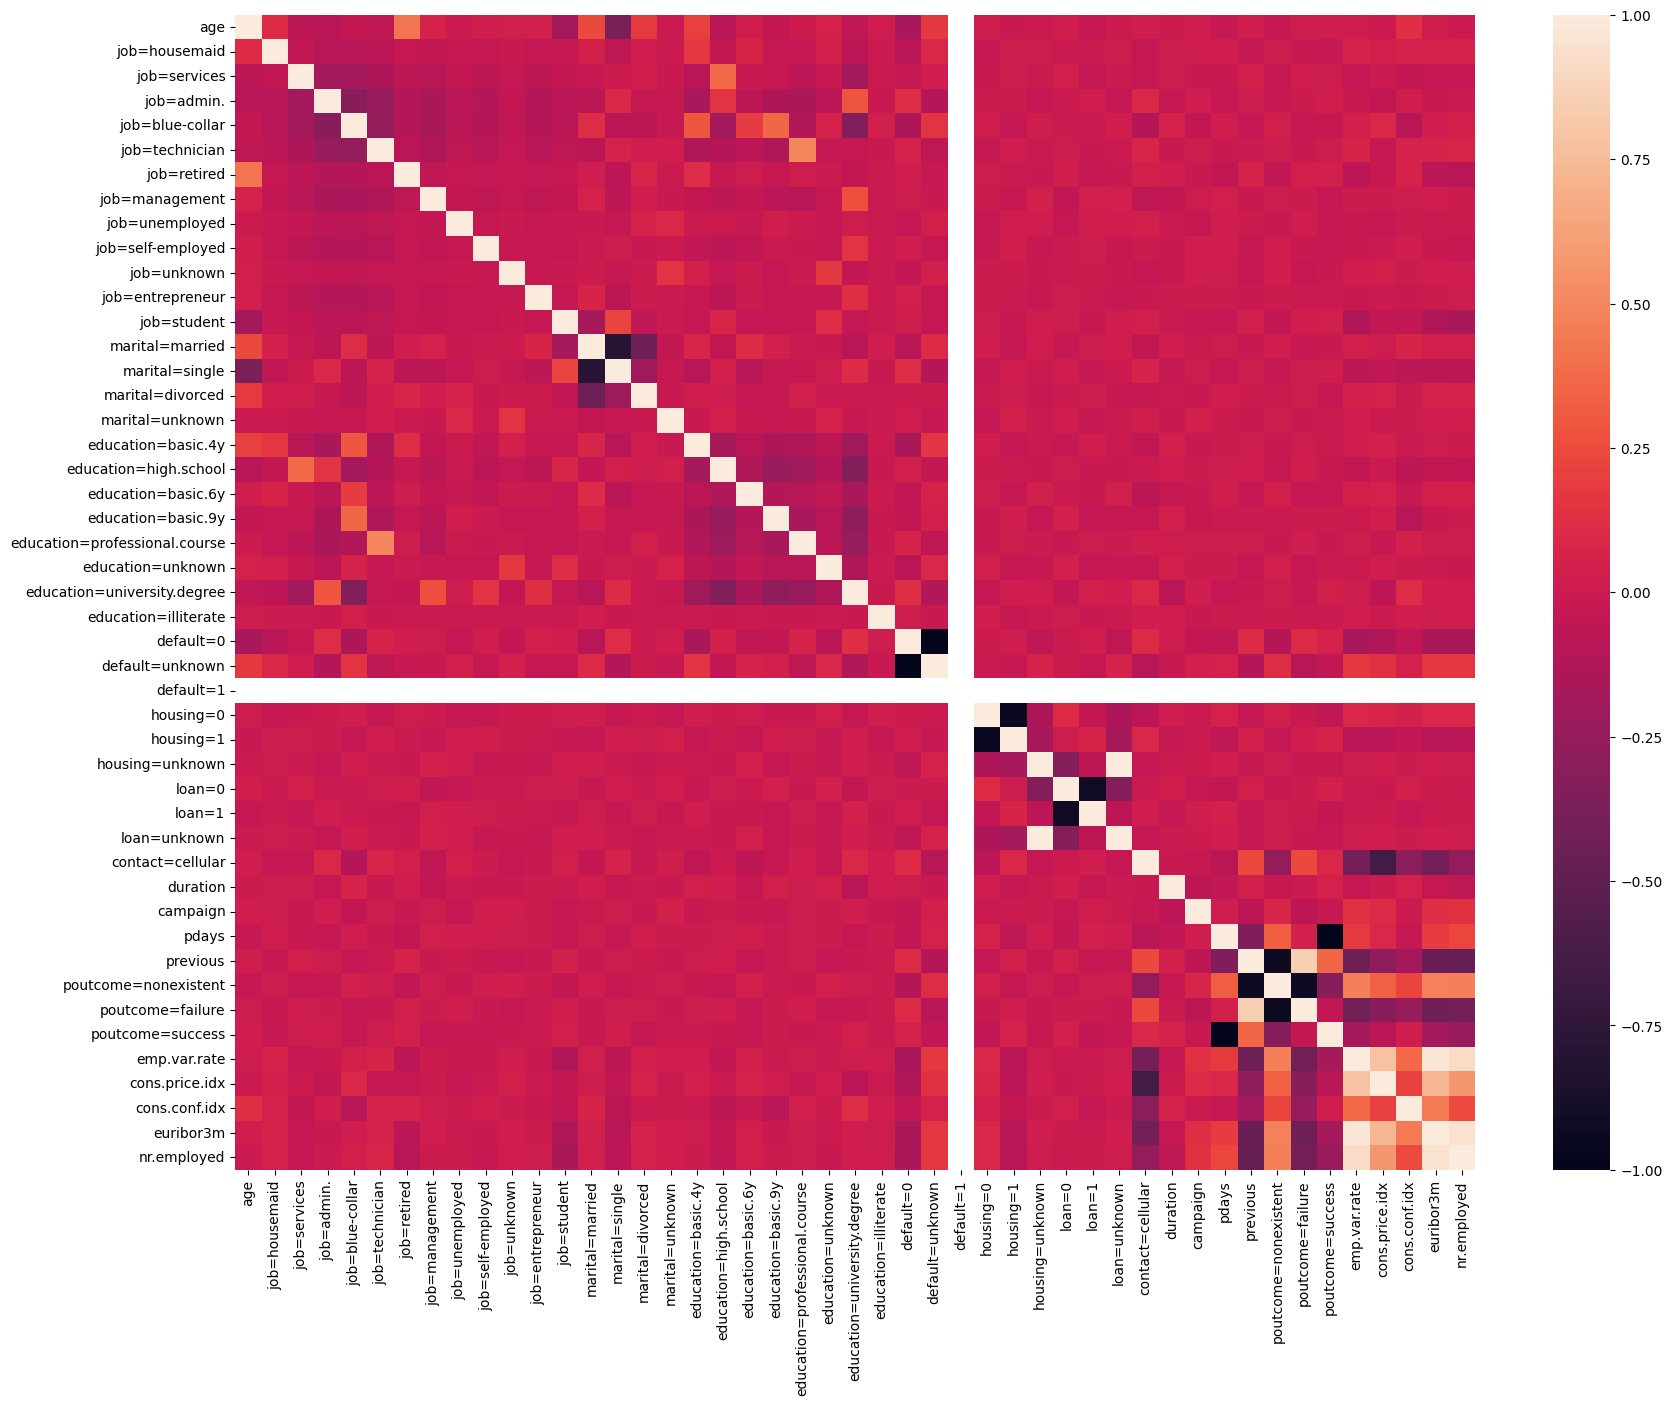

In [423]:
corr3 = X_validation_normal.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr3)

<Axes: >

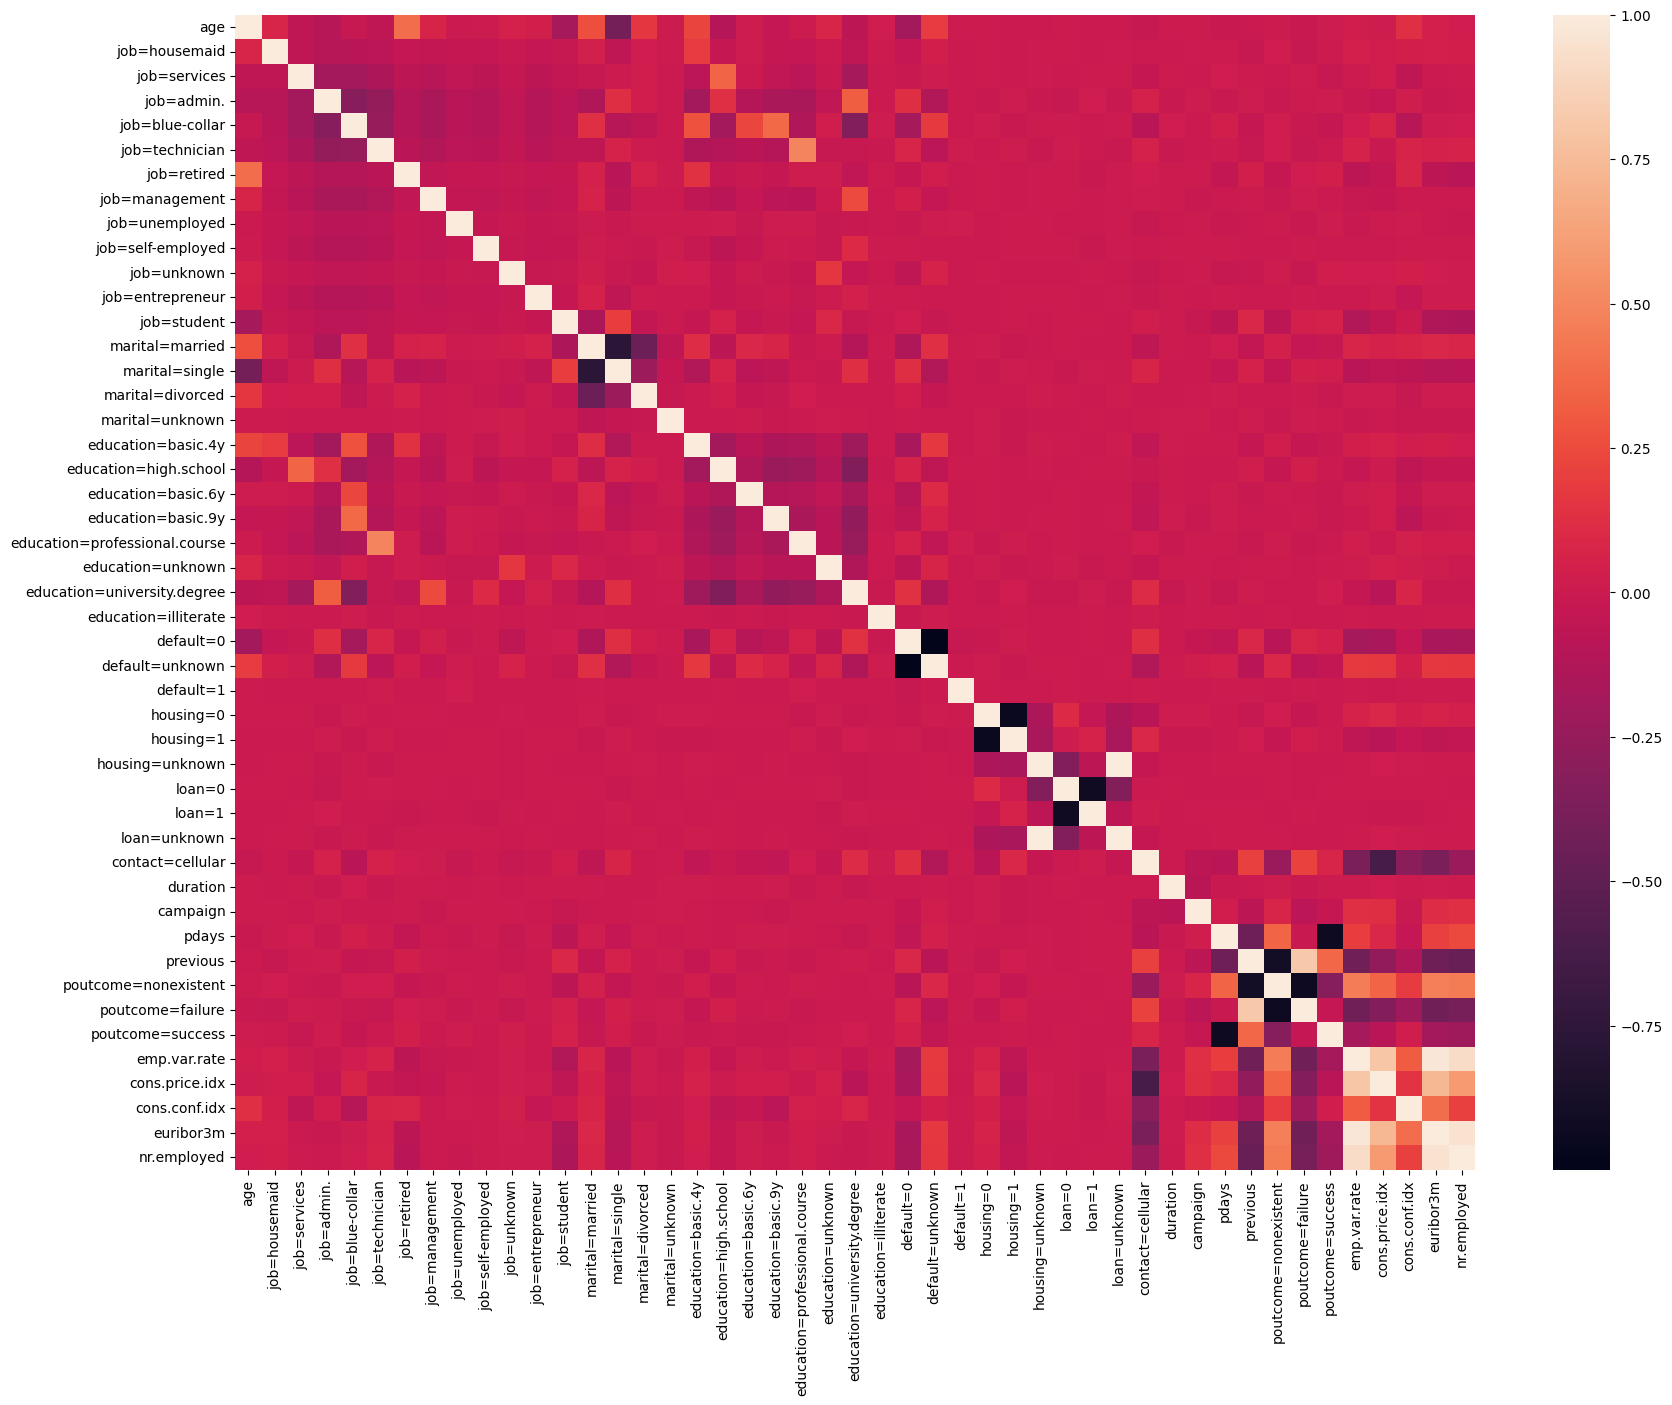

In [424]:
corr4 = X_train_normal.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr4)

<Axes: >

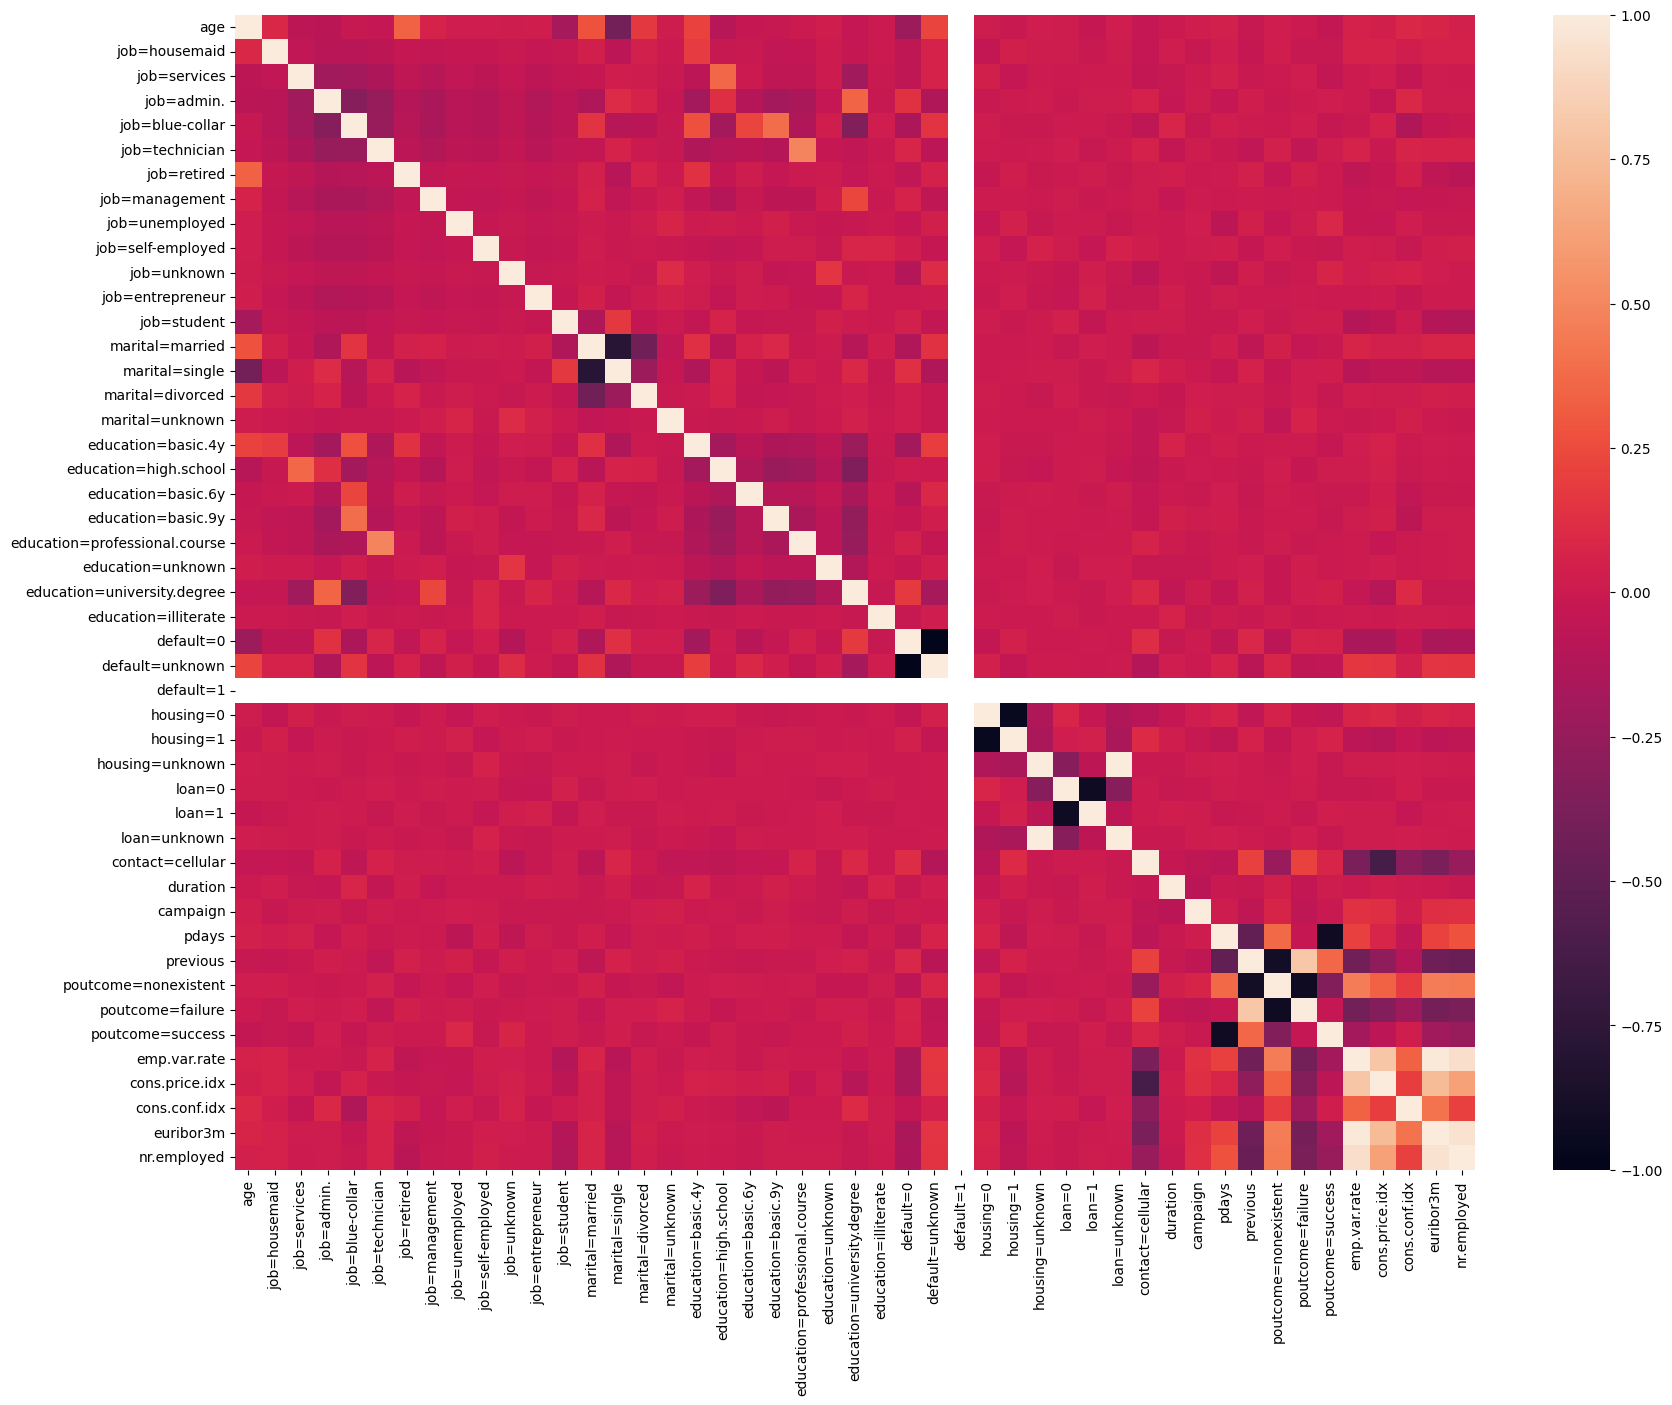

In [425]:
corr5 = X_test_normal.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr5)

In [426]:
sum(normalData['education=illiterate'])

11

I was worrdied why this wasn't showing up in the test and validation but there is only 14 illiterates, harsh lable.

#5.) Create an SVM based anomaly detector, set it with a variable cutoff boundary, set this to 5% to start with, but be sure it is adjustable in code. SVM gives you various options of operation, try several and find the optimum.

In [427]:
from sklearn import svm
from sklearn.metrics import accuracy_score

https://www.stratascratch.com/blog/machine-learning-algorithms-explained-support-vector-machine/

Best explanation I have ever seen I finally get it.

Self notes about how this works:

Since the algorithm has to classify data points that consist of only one class, then one possibility is that the resulting Support Vector Classifier would be in a circular shape. Thus, the goal is to fit the radius of the Support Vector Classifier with some optimization algorithms.

So I can train on only one class as it only creates a radius and anything that falls outside it is an anomoly.


In [428]:
clf_svm = svm.OneClassSVM(kernel="rbf", gamma=0.10, nu=0.15)
#clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf_svm.fit(X_train_normal)

OneClassSVM(gamma=0.1, nu=0.15)

In [429]:
y_predict_test_normal =  clf_svm.predict(X_test_normal)
y_predict_test_anomalies =  clf_svm.predict(X_test_anomalies)
y_predict_validation_anomalies =  clf_svm.predict(X_validation_anomalies)
y_predict_validation_normal =  clf_svm.predict(X_validation_normal)

In [430]:
n_error_train = y_predict_test_normal[y_predict_test_normal == -1].size
n_error_test = y_predict_validation_normal[y_predict_validation_normal == -1].size
n_error_outliers = y_predict_test_anomalies[y_predict_test_anomalies == 1].size

In [431]:
n_error_train

324

In [432]:
n_error_test

344

In [433]:
# Number incorrectly classified
n_error_outliers/len(y_test_anomalies)

0.6133620689655173

In [434]:
svm_predict1 = pd.Series(y_predict_test_normal).replace([-1,1],[1,0])
# Calculate accuracy
accuracy = accuracy_score(y_test_normal, svm_predict1)
print("Accuracy:", accuracy)

Accuracy: 0.8603448275862069


In [435]:
svm_predict2 = pd.Series(y_predict_test_anomalies).replace([-1,1],[1,0])
# Calculate accuracy
accuracy2 = accuracy_score(y_test_anomalies, svm_predict2)
print("Accuracy:", accuracy2)

Accuracy: 0.38663793103448274


In [436]:
svm_predict3 = pd.Series(y_predict_validation_anomalies).replace([-1,1],[1,0])
# Calculate accuracy
accuracy3 = accuracy_score(y_validation_anomalies, svm_predict3)
print("Accuracy:", accuracy3)

Accuracy: 0.37198275862068964


In [437]:
svm_predict4 = pd.Series(y_predict_validation_normal).replace([-1,1],[1,0])
# Calculate accuracy
accuracy4 = accuracy_score(y_validation_normal, svm_predict4)
print("Accuracy: ", accuracy4)

Accuracy:  0.8517241379310345


I am going to leave it like this

# As you decrease nu value it overfits but as you increase it gets better at recognizing outliers but wourse at recognizing normal values

### I had it at nu = .1 accuracy got worse. But ofcouse that just means the circle is small and can classyfy this specific one.

#6.) Produce a confusion matrix of correct and incorrect anomaly detections, using your validation data. Show this at several different boundary levels.

In [438]:
clf_svm1 = svm.OneClassSVM(kernel="rbf", gamma=0.10, nu=0.15)
#clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf_svm1.fit(X_train_normal)

OneClassSVM(gamma=0.1, nu=0.15)

In [439]:
y_predict_validation_anomalies1 =  clf_svm1.predict(X_validation_anomalies)
y_predict_validation_normal1 =  clf_svm1.predict(X_validation_normal)

In [440]:
y_predict_validation_anomalies1 = pd.Series(y_predict_validation_anomalies1).replace([-1,1],[1,0])
y_predict_validation_normal1 = pd.Series(y_predict_validation_normal1).replace([-1,1],[1,0])

In [441]:
clf_svm2 = svm.OneClassSVM(kernel="rbf", gamma=0.10, nu=0.10)
#clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf_svm2.fit(X_train_normal)

OneClassSVM(gamma=0.1, nu=0.1)

In [442]:
y_predict_validation_anomalies2 =  clf_svm2.predict(X_validation_anomalies)
y_predict_validation_normal2 =  clf_svm2.predict(X_validation_normal)

In [443]:
y_predict_validation_anomalies2 = pd.Series(y_predict_validation_anomalies2).replace([-1,1],[1,0])
y_predict_validation_normal2 = pd.Series(y_predict_validation_normal2).replace([-1,1],[1,0])

In [444]:
clf_svm3 = svm.OneClassSVM(kernel="rbf", gamma=0.10, nu=0.05)
#clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf_svm3.fit(X_train_normal)

OneClassSVM(gamma=0.1, nu=0.05)

In [445]:
y_predict_validation_anomalies3 =  clf_svm3.predict(X_validation_anomalies)
y_predict_validation_normal3 =  clf_svm3.predict(X_validation_normal)

In [446]:
y_predict_validation_anomalies3 = pd.Series(y_predict_validation_anomalies3).replace([-1,1],[1,0])
y_predict_validation_normal3 = pd.Series(y_predict_validation_normal3).replace([-1,1],[1,0])

In [447]:
clf_svm4 = svm.OneClassSVM(kernel="rbf", gamma=0.10, nu=0.01)
#clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf_svm4.fit(X_train_normal)

OneClassSVM(gamma=0.1, nu=0.01)

In [448]:
y_predict_validation_anomalies4 =  clf_svm4.predict(X_validation_anomalies)
y_predict_validation_normal4 =  clf_svm4.predict(X_validation_normal)

In [449]:
y_predict_validation_anomalies4 = pd.Series(y_predict_validation_anomalies4).replace([-1,1],[1,0])
y_predict_validation_normal4 = pd.Series(y_predict_validation_normal4).replace([-1,1],[1,0])

In [450]:
from sklearn.metrics import ConfusionMatrixDisplay

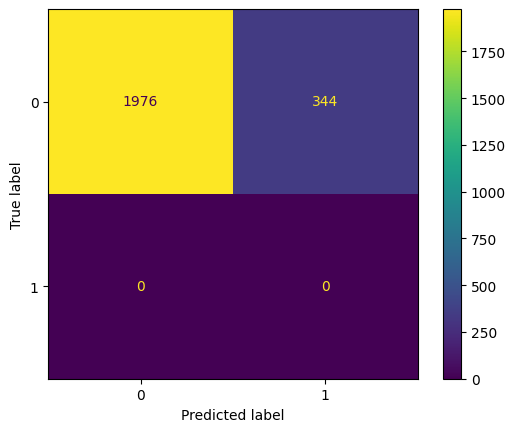

In [451]:
ConfusionMatrixDisplay.from_predictions(y_validation_normal, y_predict_validation_normal1)

I was confused for a second about why the bottom 2 are zero but all the lables are seperate for this project so actual lables are going to all be the same 0 or 1s

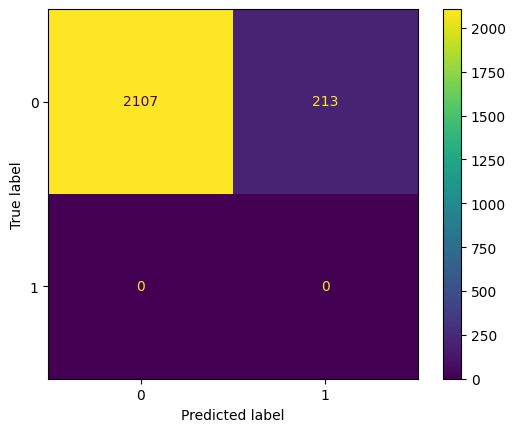

In [452]:
ConfusionMatrixDisplay.from_predictions(y_validation_normal, y_predict_validation_normal2)

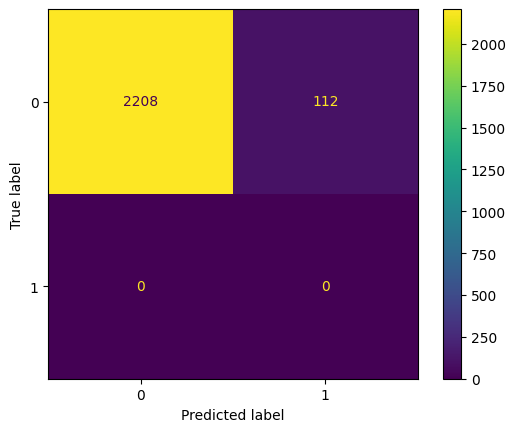

In [453]:
ConfusionMatrixDisplay.from_predictions(y_validation_normal, y_predict_validation_normal3)

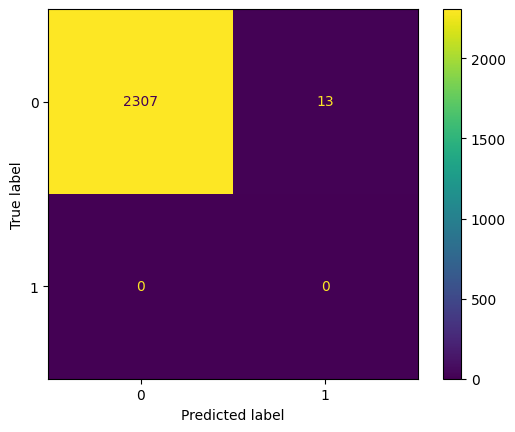

In [454]:
ConfusionMatrixDisplay.from_predictions(y_validation_normal, y_predict_validation_normal4)

anomaliesData

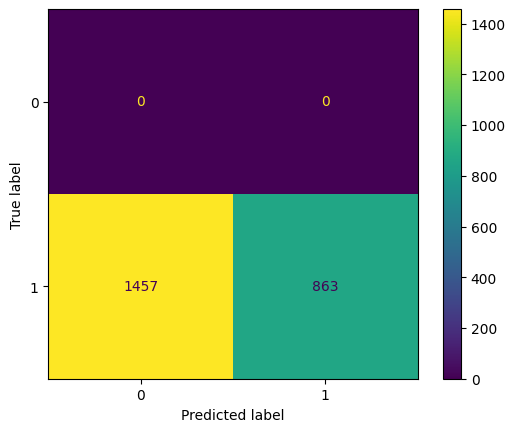

In [455]:
ConfusionMatrixDisplay.from_predictions(y_validation_anomalies, y_predict_validation_anomalies1)

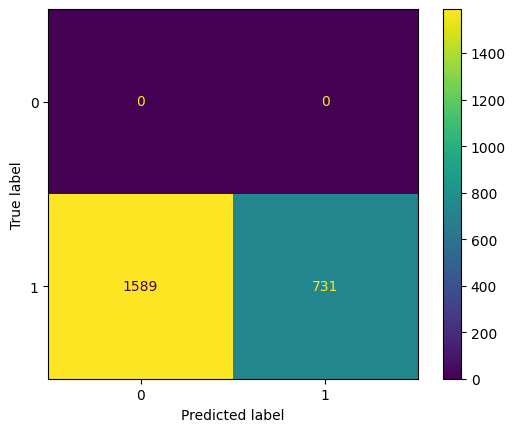

In [456]:
ConfusionMatrixDisplay.from_predictions(y_validation_anomalies, y_predict_validation_anomalies2)

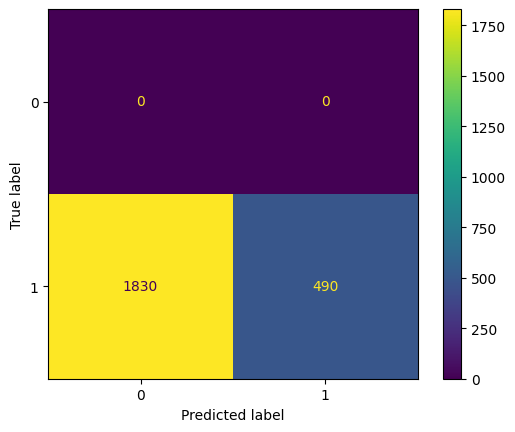

In [457]:
ConfusionMatrixDisplay.from_predictions(y_validation_anomalies, y_predict_validation_anomalies3)

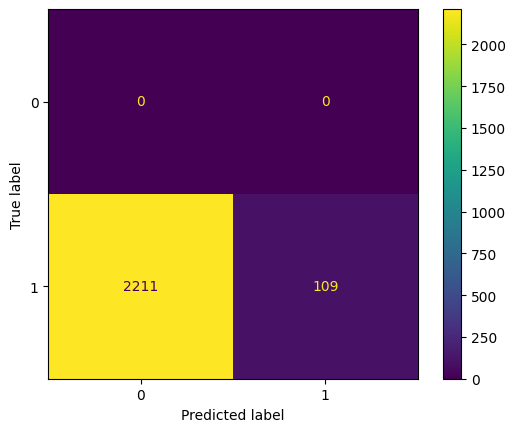

In [458]:
ConfusionMatrixDisplay.from_predictions(y_validation_anomalies, y_predict_validation_anomalies4)

#7.) Now build an anomaly detector (autoencoder) using Tensorflow and Keras. Optimize its operation at least a bit . Determine how to set up the boundary to detect anomalous and non-anomalous results.

Anomaly Detector: After all that training, it can spot anomalies. It does this by turning data into input data and comparing them. There’s this thing called the “reconstruction error” – basically, how much the reconstructed data differs from the original. If the difference is too big, it’s a red alert – an anomaly!
Step-by-step

/www.geeksforgeeks.org

In [504]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [505]:
X_train_normal.shape

(31908, 47)

In [519]:

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(47, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [520]:
autoencoder.compile(optimizer='adam', loss='mae')

In [521]:
history = autoencoder.fit(X_train_normal, X_train_normal,
          epochs=20,
          batch_size=512,
          validation_data=(X_test_normal, X_test_normal),
          shuffle=True)

Epoch 1/20
63/63 [==============================] - 2s 7ms/step - loss: 0.3390 - val_loss: 0.1535
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 0.1375 - val_loss: 0.1363
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 0.1355 - val_loss: 0.1361
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 0.1350 - val_loss: 0.1352
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.1329 - val_loss: 0.1312
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.1270 - val_loss: 0.1257
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.1246 - val_loss: 0.1253
Epoch 8/20
63/63 [==============================] - 0s 4ms/step - loss: 0.1240 - val_loss: 0.1243
Epoch 9/20
63/63 [==============================] - 0s 4ms/step - loss: 0.1231 - val_loss: 0.1237
Epoch 10/20
63/63 [==============================] - 0s 4ms/step - loss: 0.1228 - val_loss: 0.1236
Epoch 11/20
63/63 [

In [509]:
# I want to kill myseflf I was stuck on a bug for 2 hours! end me.

In [543]:
reconstructions = autoencoder.predict(X_train_normal)
train_loss = tf.keras.losses.mae(reconstructions, X_train_normal)

998/998 [==============================] - 2s 2ms/step


In [544]:

threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.1638163668246907


In [545]:
reconstructions = autoencoder.predict(X_test_anomalies)
test_loss = tf.keras.losses.mae(reconstructions, X_test_anomalies)

73/73 [==============================] - 0s 2ms/step


In [542]:
# Evaluate the Autoencoder
predictions = autoencoder.predict(X_test_anomalies)


mse = np.mean(np.power(X_test_anomalies - predictions, 2), axis=1)

# Set a threshold for anomaly detection
threshold2 = 0.1  # You may need to adjust this threshold based on experimentation

# Classify anomalies based on the threshold
anomalies = mse > threshold2

# Evaluate the Anomaly Detection Model

y_pred = anomalies.astype(int)

accuracy = accuracy_score(y_test_anomalies, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')


73/73 [==============================] - 0s 3ms/step
Test Accuracy: 0.6957


In [538]:
# Evaluate the Autoencoder
predictions = autoencoder.predict(X_validation_anomalies)


mse = np.mean(np.power(X_validation_anomalies - predictions, 2), axis=1)

# Set a threshold for anomaly detection
threshold = 0.1  # You may need to adjust this threshold based on experimentation

# Classify anomalies based on the threshold
anomalies = mse > threshold

# Evaluate the Anomaly Detection Model

y_pred = anomalies.astype(int)

accuracy = accuracy_score(y_validation_anomalies, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

73/73 [==============================] - 0s 3ms/step
Test Accuracy: 0.6935


In [539]:
# Evaluate the Autoencoder
predictions = autoencoder.predict(X_validation_normal)


mse = np.mean(np.power(X_validation_normal - predictions, 2), axis=1)

# Set a threshold for anomaly detection
threshold = 0.1  # You may need to adjust this threshold based on experimentation

# Classify anomalies based on the threshold
anomalies = mse > threshold

# Evaluate the Anomaly Detection Model

y_pred = anomalies.astype(int)

accuracy = accuracy_score(y_validation_normal, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

73/73 [==============================] - 0s 3ms/step
Test Accuracy: 0.3823


#8.) Decide which of the two methods seems to work best, using your validation data. Can you figure out how to make simultaneous use of both methods to improve overall performance? Do the two methods make the same mistakes in anomaly detection or are there differences in the two? Once you have figured out what method, or combination of methods, works best, set it up and run it on your test data. Report the rate of correct assignment of both anomalies and regular (normal) data

In [548]:
from sklearn.ensemble import VotingClassifier

In [551]:
# Evaluate the Autoencoder
predictions = autoencoder.predict(X_validation_anomalies)


mse = np.mean(np.power(X_validation_anomalies - predictions, 2), axis=1)

# Set a threshold for anomaly detection
threshold = 0.1  # You may need to adjust this threshold based on experimentation

# Classify anomalies based on the threshold
anomalies = mse > threshold

# Evaluate the Anomaly Detection Model

y_pred = anomalies.astype(int)

accuracy = accuracy_score(y_validation_anomalies, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

73/73 [==============================] - 0s 3ms/step
Test Accuracy: 0.6935


In [552]:
svm_predict3 = pd.Series(y_predict_validation_anomalies).replace([-1,1],[1,0])
# Calculate accuracy
accuracy3 = accuracy_score(y_validation_anomalies, svm_predict3)
print("Accuracy:", accuracy3)

Accuracy: 0.37198275862068964


In [554]:

# Evaluate the Autoencoder
predictions = autoencoder.predict(X_validation_normal)


mse = np.mean(np.power(X_validation_normal - predictions, 2), axis=1)

# Set a threshold for anomaly detection
threshold = 0.1  # You may need to adjust this threshold based on experimentation

# Classify anomalies based on the threshold
anomalies = mse < threshold

# Evaluate the Anomaly Detection Model

y_pred = anomalies.astype(int)

accuracy = accuracy_score(y_validation_normal, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')


73/73 [==============================] - 0s 3ms/step
Test Accuracy: 0.6177


In [555]:
svm_predict4 = pd.Series(y_predict_validation_normal).replace([-1,1],[1,0])
# Calculate accuracy
accuracy4 = accuracy_score(y_validation_normal, svm_predict4)
print("Accuracy: ", accuracy4)

Accuracy:  0.8517241379310345


This question heavyly depeends on your threshold for your nural net and your nu value and what ratio you want for regular vs abnorbal detections.

In [557]:
# Evaluate the Autoencoder
predictions = autoencoder.predict(X_test_anomalies)


mse = np.mean(np.power(X_test_anomalies - predictions, 2), axis=1)

# Set a threshold for anomaly detection
threshold = 0.1  # You may need to adjust this threshold based on experimentation

# Classify anomalies based on the threshold
anomalies = mse > threshold

# Evaluate the Anomaly Detection Model

y_pred = anomalies.astype(int)

accuracy = accuracy_score(y_test_anomalies, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

73/73 [==============================] - 1s 7ms/step
Test Accuracy: 0.6957


In [558]:
svm_predict2 = pd.Series(y_predict_test_anomalies).replace([-1,1],[1,0])
# Calculate accuracy
accuracy2 = accuracy_score(y_test_anomalies, svm_predict2)
print("Accuracy:", accuracy2)

Accuracy: 0.38663793103448274


Nural net wins

In [559]:
# Evaluate the Autoencoder
predictions = autoencoder.predict(X_test_normal)


mse = np.mean(np.power(X_test_anomalies - predictions, 2), axis=1)

# Set a threshold for anomaly detection
threshold = 0.1  # You may need to adjust this threshold based on experimentation

# Classify anomalies based on the threshold
anomalies = mse > threshold

# Evaluate the Anomaly Detection Model

y_pred = anomalies.astype(int)

accuracy = accuracy_score(y_test_normal, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

73/73 [==============================] - 0s 2ms/step
Test Accuracy: 0.1961


In [560]:
svm_predict1 = pd.Series(y_predict_test_normal).replace([-1,1],[1,0])
# Calculate accuracy
accuracy = accuracy_score(y_test_normal, svm_predict1)
print("Accuracy:", accuracy)

Accuracy: 0.8603448275862069


Now SVM wins.